In [4]:
import os
import csv

# 初始化变量
metadata = []
header = ['type', 'float_data路径', 'hdr_data路径']
root_dir = 'data'
output_csv = 'data/metadata.csv'

# 遍历根目录
for data_type in os.listdir(root_dir):
    type_dir = os.path.join(root_dir, data_type)
    
    # 确保是目录
    if not os.path.isdir(type_dir):
        continue
    
    # 遍历类型目录
    for filename in os.listdir(type_dir):
        if filename.endswith('.float'):
            # 构建相对路径
            float_path = os.path.join(data_type, filename)
            hdr_path = os.path.join(data_type, filename.replace('.float', '.hdr'))
            
            # 构建绝对路径用于检查文件是否存在
            abs_float_path = os.path.join(type_dir, filename)
            abs_hdr_path = os.path.join(type_dir, filename.replace('.float', '.hdr'))
            
            # 检查对应的 .hdr 文件是否存在
            if os.path.exists(abs_hdr_path):
                metadata.append([data_type, float_path, hdr_path])
            else:
                print(f"警告: 找不到对应的 HDR 文件: {abs_hdr_path}")

# 写入 CSV 文件
with open(output_csv, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(header)  # 写入 header
    csvwriter.writerows(metadata)  # 写入数据

print(f"metadata 文件已生成: {output_csv}")

警告: 找不到对应的 HDR 文件: data/type1/train_type1_37.hdr
metadata 文件已生成: data/metadata.csv


---

In [1]:
import pandas as pd
import random

df = pd.read_csv('data/metadata.csv')


In [ ]:
import numpy as np
import os

random_row = df.iloc[random.randint(0, len(df) - 1)]

float_path = random_row['float_data路径']
hdr_path = random_row['hdr_data路径']

print(float_path)
print(hdr_path)

# 读取.float文件
float_data = np.fromfile(os.path.join('data', float_path), dtype=np.float32)
print(f"float文件维度: {float_data.shape}\n\n")

# 读取.hdr文件
with open(os.path.join('data', hdr_path), 'r') as f:
    hdr_content = f.read()
print(f"hdr文件内容:\n{hdr_content}")

# 检查wavelength长度
wavelength = [float(w.strip()) for w in hdr_content.split('wavelength = {')[1].split('}')[0].split(',')]
print(f"\nwavelength长度: {len(wavelength)}")

type1/train_type1_71.float
type1/train_type1_71.hdr


float文件维度: (46333952,)


hdr文件内容:
ENVI
description = {}
samples = 696
lines   = 520
bands   = 128
header offset = 32768
major frame offsets = {0, 0}
file type = ENVI Standard
data type = 4
interleave =  bil
sensor type = Unknown
byte order = 0
wavelength units = Unknown


wavelength = {
376.7900, 381.6812, 386.5776, 391.4791, 396.3858, 401.2976, 406.2145, 411.1366, 416.0639, 420.9962, 425.9338, 430.8765, 435.8243, 440.7773, 445.7354, 450.6986, 455.6671, 460.6406, 465.6193, 470.6032, 475.5922, 480.5863, 485.5856, 490.5900, 495.5996, 500.6143, 505.6342, 510.6592, 515.6893, 520.7247, 525.7651, 530.8108, 535.8615, 540.9174, 545.9784, 551.0446, 556.1160, 561.1924, 566.2740, 571.3608, 576.4528, 581.5498, 586.6520, 591.7594, 596.8718, 601.9895, 607.1123, 612.2402, 617.3733, 622.5115, 627.6549, 632.8035, 637.9571, 643.1159, 648.2798, 653.4490, 658.6232, 663.8026, 668.9872, 674.1768, 679.3717, 684.5717, 689.7769, 694.9871, 700.2025, 705.4230, 710.6488, 715.8796, 721.1156, 726.3568, 731.6031, 73

原始float文件维度: (46333952,)
需要跳过的值数量: 8192
跳过offset后的float文件维度: (46325760,)
预期的数据点数量: 46325760
重塑后的图像维度: (520, 696, 128)


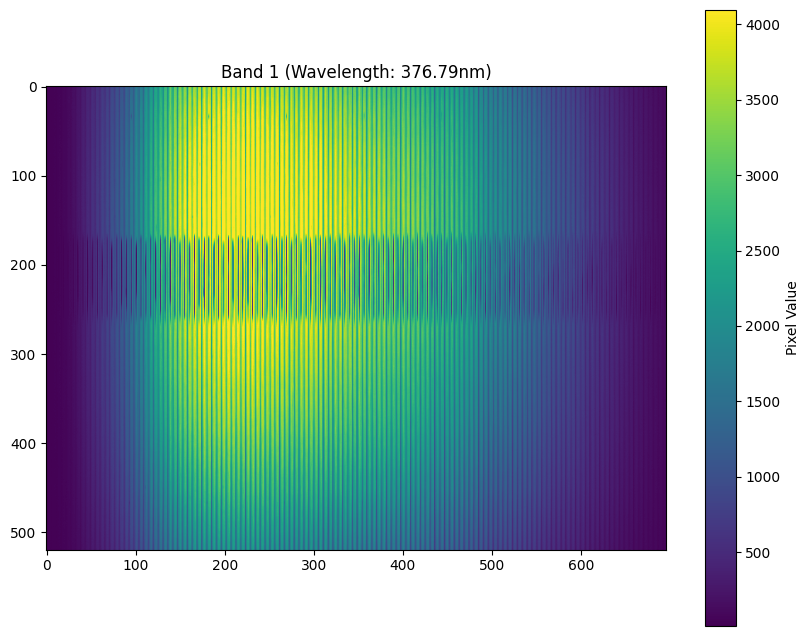

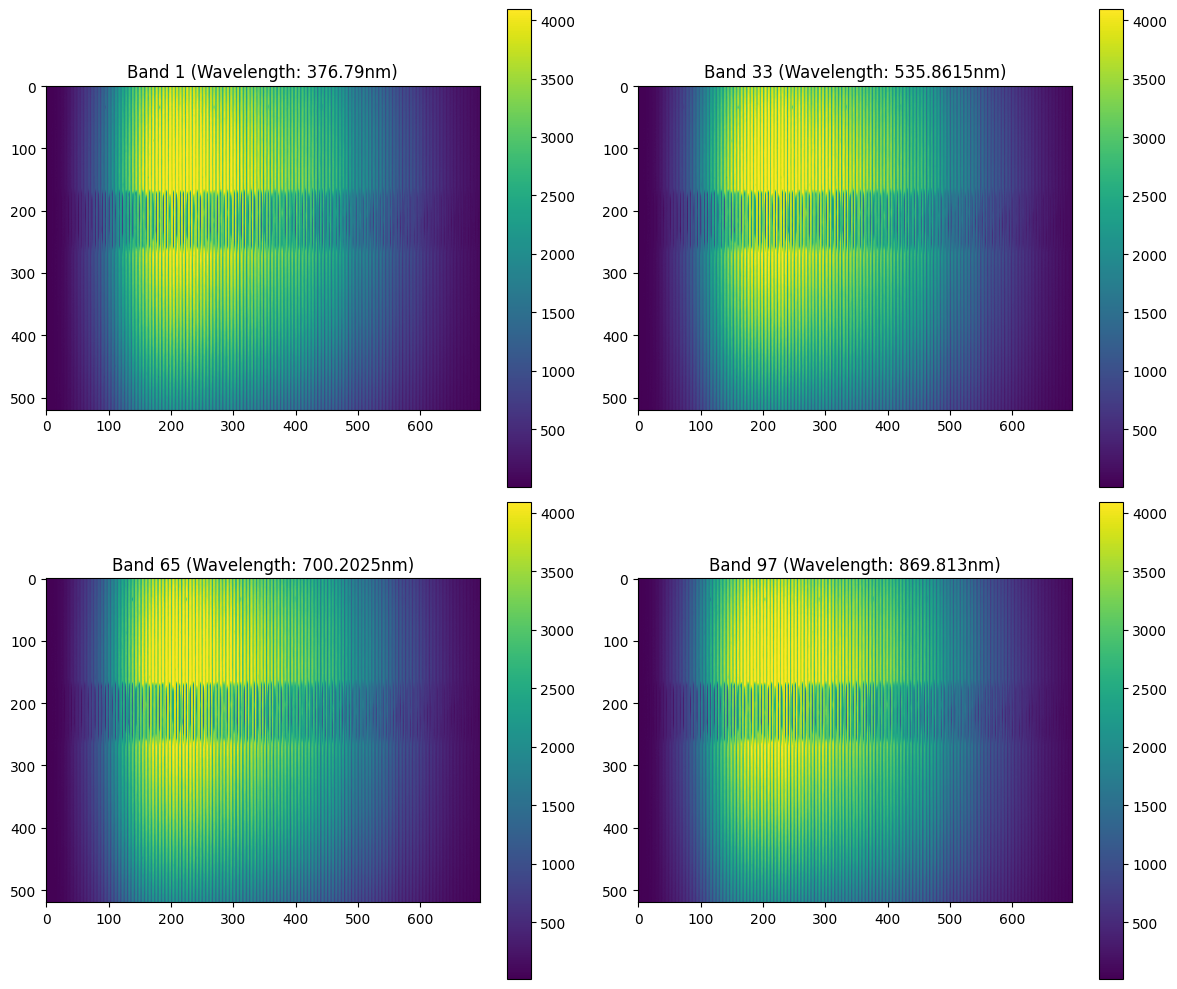

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 读取.float文件
float_data = np.fromfile(os.path.join('data', float_path), dtype=np.float32)
print(f"原始float文件维度: {float_data.shape}")

# 计算需要跳过的值数量
offset_values = 32768 // 4  # header offset字节数除以4(float32的字节数)
print(f"需要跳过的值数量: {offset_values}")

# 跳过header offset
float_data = float_data[offset_values:]
print(f"跳过offset后的float文件维度: {float_data.shape}")

# 计算预期的数据点数量
expected_size = 520 * 696 * 128
print(f"预期的数据点数量: {expected_size}")

# 如果数据量超出预期，进行截断
if len(float_data) > expected_size:
    float_data = float_data[:expected_size]
    print(f"截断后的float文件维度: {float_data.shape}")

# 重塑为三维图像 - bil格式(Band Interleaved by Line)
# bil格式下，数据排列为: 第1行的所有波段，第2行的所有波段...
# 因此我们需要reshape为(height, width, bands)
hyperspectral_image = float_data.reshape(520, 696, 128)
print(f"重塑后的图像维度: {hyperspectral_image.shape}")

# 可视化一个波段的图像作为示例
band_idx = 0  # 展示第一个波段
plt.figure(figsize=(10, 8))
plt.imshow(hyperspectral_image[:, :, band_idx], cmap='viridis')
plt.colorbar(label='Pixel Value')
plt.title(f'Band {band_idx+1} (Wavelength: {376.79}nm)')
plt.show()

# 可以再展示几个不同波段的图像
band_indices = [0, 32, 64, 96]  # 选择几个不同的波段
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, band_idx in enumerate(band_indices):
    wavelength = [float(w.strip()) for w in hdr_content.split('wavelength = {')[1].split('}')[0].split(',')]
    ax = axes[i]
    im = ax.imshow(hyperspectral_image[:, :, band_idx], cmap='viridis')
    ax.set_title(f'Band {band_idx+1} (Wavelength: {wavelength[band_idx]}nm)')
    fig.colorbar(im, ax=ax)

plt.tight_layout()
plt.show()

In [12]:
# 读取metadata.csv文件
import os 
import csv

data_dir = 'data'
metadata_path = os.path.join(data_dir, 'metadata.csv')
first_wavelengths = None

with open(metadata_path, 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)  # 跳过header行
    
    for data_type, float_path, hdr_path, _ in csvreader:
        # 读取HDR文件内容
        abs_hdr_path = os.path.join(data_dir, hdr_path)
        with open(abs_hdr_path, 'r') as f:
            hdr_content = f.read()
        
        # 提取波长信息
        wavelengths = [float(w.strip()) for w in hdr_content.split('wavelength = {')[1].split('}')[0].split(',')]
        # print(wavelengths)
        # 检查波长信息是否一致
        if first_wavelengths is None:
            first_wavelengths = wavelengths
        else:
            if wavelengths != first_wavelengths:
                print(f"警告: HDR文件 {abs_hdr_path} 的波长信息与第一个HDR文件不一致！")

print("metadata文件检查完成")

metadata文件检查完成


---

In [13]:
import pickle
import numpy as np

feature_path = 'data/features/images/train_type1_1_features.pkl'

with open(feature_path, 'rb') as f:
    features = pickle.load(f)

print(f"特征的类型: {type(features)}")

if isinstance(features, np.ndarray):
    print(f"特征的维度: {features.shape}")
else:
    print("特征不是NumPy数组，无法显示维度。")


特征的类型: <class 'numpy.ndarray'>
特征的维度: (128, 1, 768)


In [14]:
import csv

metadata_path = 'data/metadata.csv'
type1_count = 0
type2_count = 0
total_count = 0

with open(metadata_path, 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)  # Skip header row
    
    for data_type, _, _, _ in csvreader:
        total_count += 1
        if data_type == 'type1':
            type1_count += 1
        elif data_type == 'type2':
            type2_count += 1

print(f"Type1 样本数量: {type1_count}")
print(f"Type2 样本数量: {type2_count}")
print(f"总样本数量: {total_count}")


Type1 样本数量: 132
Type2 样本数量: 50
总样本数量: 182
